In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2 

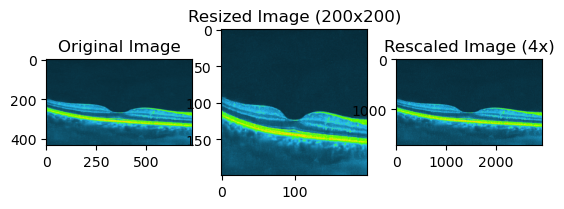

In [99]:
image = cv.imread('images/3.png')  

# Resize the image to 200x200
resized_image = cv.resize(image, (200, 200))

# Rescale the image by a factor of 4
rescaled_image = cv.resize(image, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

# Display the results
plt.subplot(131), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(cv.cvtColor(resized_image, cv.COLOR_BGR2RGB)), plt.title('Resized Image (200x200)')
plt.subplot(133), plt.imshow(cv.cvtColor(rescaled_image, cv.COLOR_BGR2RGB)), plt.title('Rescaled Image (4x)')
plt.show()


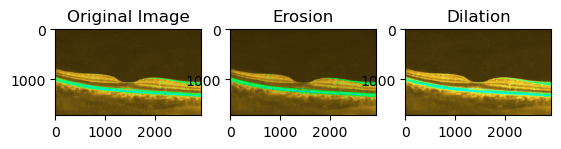

In [100]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Erosion
erosion = cv.erode(rescaled_image, kernel, iterations=2)

# Dilation
dilation = cv.dilate(rescaled_image, kernel, iterations=2)

# Display the results
plt.subplot(131), plt.imshow(rescaled_image), plt.title('Original Image')
plt.subplot(132), plt.imshow(erosion), plt.title('Erosion')
plt.subplot(133), plt.imshow(dilation), plt.title('Dilation')
plt.show()

(<matplotlib.image.AxesImage at 0x23bddfb8d50>, Text(0.5, 1.0, 'Dilation'))

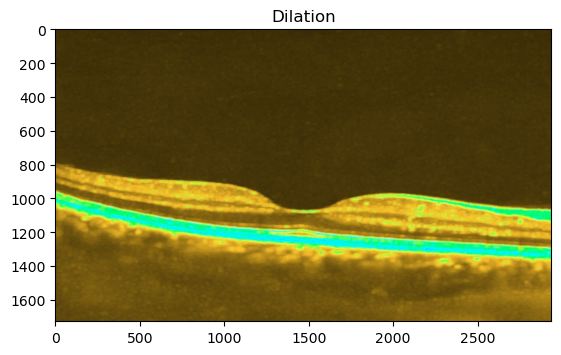

In [101]:
plt.imshow(dilation), plt.title('Dilation')

(<matplotlib.image.AxesImage at 0x23bde007290>, Text(0.5, 1.0, 'erosion'))

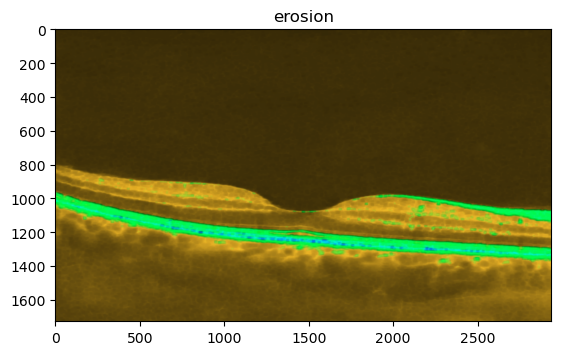

In [102]:
plt.imshow(erosion), plt.title('erosion')

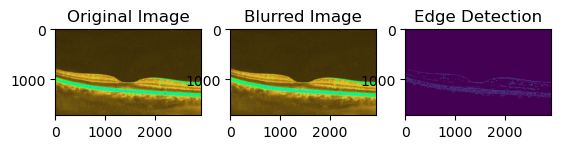

In [103]:
# Apply Gaussian blur to reduce noise
blurred_image = cv.GaussianBlur(rescaled_image, (5, 5), 0)

# to gray
image_gray = cv.cvtColor(blurred_image,cv.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv.Canny(blurred_image, 10, 100)

# Display the results
plt.subplot(131), plt.imshow(rescaled_image), plt.title('Original Image')
plt.subplot(132), plt.imshow(blurred_image), plt.title('Blurred Image')
plt.subplot(133), plt.imshow(edges), plt.title('Edge Detection')
plt.show()

(<matplotlib.image.AxesImage at 0x23bcb22f450>,
 Text(0.5, 1.0, 'Edge Detection'))

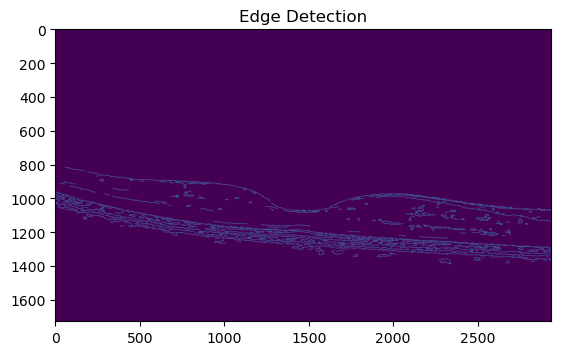

In [104]:
plt.imshow(edges), plt.title('Edge Detection')

(<matplotlib.image.AxesImage at 0x23bddbfff90>, Text(0.5, 1.0, 'Thresholding'))

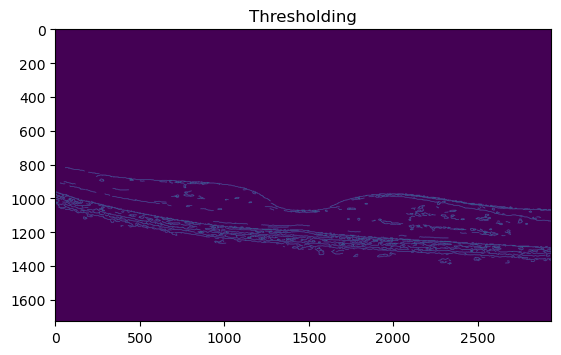

In [105]:
# thresholding:
threshold_value = 127
_, binary_image = cv.threshold(edges, threshold_value, 255, cv.THRESH_BINARY)
RPE_binary_img=binary_image
cv2.imwrite('binary_image.jpg', binary_image)
plt.imshow(binary_image), plt.title('Thresholding')

## Test 2

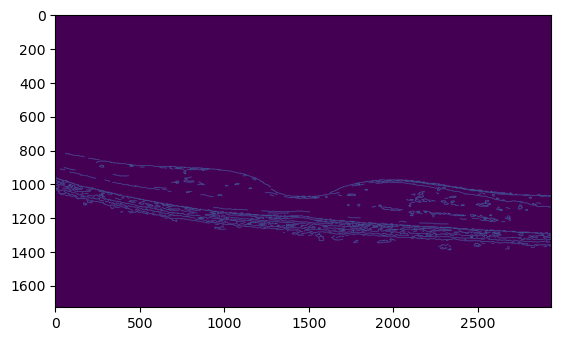

In [106]:
plt.imshow(binary_image)

In [107]:
# def preprocess_image(image_path, desired_width, desired_height, threshold1, threshold2, threshold_value):
#     # Read the image
#     image = cv.imread(image_path)

#     # Resize and rescale
#     resized_image = cv.resize(image, (desired_width, desired_height))
#     rescaled_image = cv.normalize(resized_image, None, 0, 255, cv.NORM_MINMAX)

#     # Morphological operation
#     kernel = np.ones((5, 5), np.uint8)
#     morph_image = cv.morphologyEx(rescaled_image, cv.MORPH_CLOSE, kernel)

#     # Edge detection
#     edges = cv.Canny(morph_image, threshold1, threshold2)

#     # Thresholding
#     _, binary_image = cv.threshold(edges, threshold_value, 255, cv.THRESH_BINARY)

#     return binary_image

# # Example usage:
# image_path = 'images/2.jpg'
# desired_width, desired_height = 200, 200
# threshold1, threshold2 = 50, 150
# threshold_value = 100

# preprocessed_image = preprocess_image(image_path, desired_width, desired_height, threshold1, threshold2, threshold_value)

# # Display the original and preprocessed images:
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(preprocessed_image, cmap='gray')
# plt.title('Preprocessed Image')
# plt.axis('off')

# plt.show()


Number of Keypoints: 503
ORB Descriptors Shape: (503, 32)
Centroid (x, y): (1562.5248174247276, 1163.6128122998077)
Angle between moments (alpha): 36.67506913110981


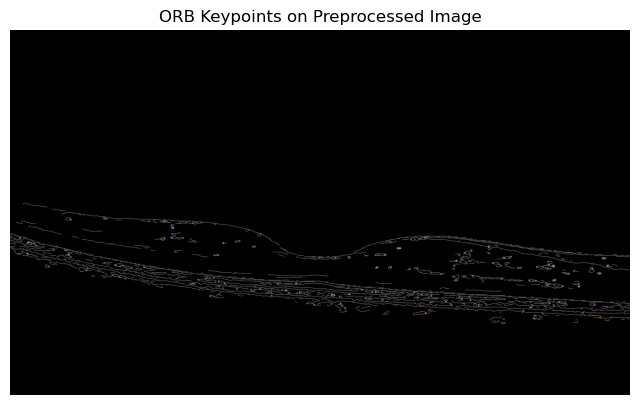

In [108]:
# Function to perform ORB feature extraction
def extract_orb_features(image):
    # Read the image
    # image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    

    # Initialize ORB detector
    orb = cv.ORB_create()
    kp = orb.detect(image,None)

    img2 = cv.drawKeypoints(image,kp,None)

    # Find the keypoints and descriptors with ORB
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Print the number of keypoints and descriptors
    print("Number of Keypoints:", len(keypoints))
    print("ORB Descriptors Shape:", descriptors.shape)

    # Visualize the keypoints on the image
    img_with_keypoints = cv.drawKeypoints(image, keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Calculate the moment and centroid
    m00 = np.sum(image)
    m10 = np.sum(np.multiply(np.arange(image.shape[1]), np.sum(image, axis=0)))
    m01 = np.sum(np.multiply(np.arange(image.shape[0]), np.sum(image, axis=1)))
    centroid_x = m10 / m00
    centroid_y = m01 / m00

    # Calculate the angle between moments
    alpha = np.degrees(np.arctan2(centroid_y, centroid_x))

    print("Centroid (x, y):", (centroid_x, centroid_y))
    print("Angle between moments (alpha):", alpha)
    
    return img2



# Sample usage

orb_img = extract_orb_features(binary_image)
# Display the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(orb_img, cmap='gray')
plt.title('ORB Keypoints on Preprocessed Image')
plt.axis('off')
plt.show()

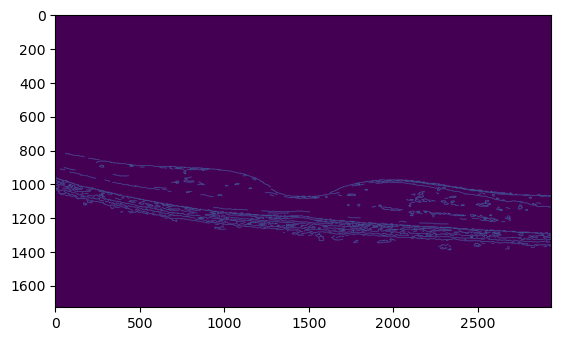

In [109]:
plt.imshow(binary_image)

5070370
3038


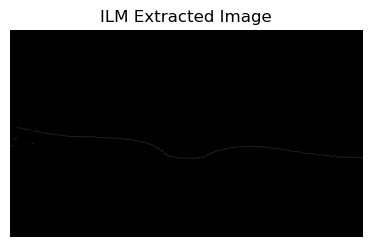

In [110]:
import copy

def ilm_extraction(img):

    image =img
    # Step 2: Initialize white as True
    white = 255

    # Step 3: Initialize black as False
    black = 0

    w = 0
    b = 0

    # Step 4: For each pixel in ILM (for i = 0 to w, where w is the width of the image)
    for i in range(image.shape[1]):
        # Step 4.1: For each pixel in ILM (for j = 0 to h, where h is the height of the image)
        for j in range(image.shape[0]):
            # Step 4.2: IF ILM[j, i] is black then continue
            if  image[j, i] == black:
                b += 1
                continue

            # Step 4.4: IF ILM[j, i] is white then
            if image[j, i] == white:
                w += 1
                # ii. WHILE (j != w and ILM[j, i] is white)
                while j != image.shape[0] and image[j, i] == 255:
                    # iii. Increment j by 1
                    j += 1

                # iv. For each pixel in ILM (for k = j to h)
                for k in range(j, image.shape[0]):
                    # v. Set ILM[k, i] to black
                    image[k, i] = 0


    print(b)
    print(w)
    return image

# Example usage
# Load your binary image (replace 'binary_image_path.png' with the actual file path)


# Extract ILM
# orginal_image = binary_image
# original_image = copy.deepcopy(binary_image)
ilm_extracted = ilm_extraction(binary_image)

# Display the original and processed images side by side
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(original_image, cmap='gray')
# plt.title('Original Binary Image')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ilm_extracted, cmap='gray')
plt.title('ILM Extracted Image')
plt.axis('off')

plt.show()


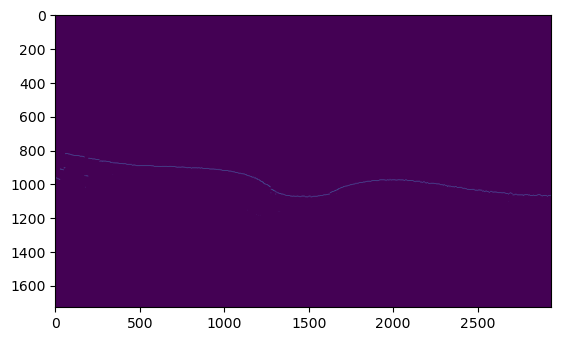

In [111]:
plt.imshow(ilm_extracted)

In [112]:
def extract_RPE(img):
    """
    Step 1: START
    Step 2: Initialize white as True
    Step 3: Initialize black as False
    Step 4: Initialize flag and k variable as 0
    Step 5:For each pixel in RPE (for i = 0 to w, where w is the width of the image)
        Step 5.1: For each pixel in RPE (for j = 0 to h, where h is the height of the image)
        Step 5.2: IF RPE[j,i]==black then 
            i. continue
        Step 5.3: END IF
        Step 5.4: ELSE:
            ii. WHILE(j!= w and RPE[j,i]==white):
                iii. RPE[j,i]=black
            iv. increment j by 1
            v. set k equals to j
            vi. break
            vii. END WHILE
        Step 5.5: For each pixel in RPE (for l = k to h)
            viii. IF RPE[l,i]==black then
                1. Continue
            ix. END IF
            x. IF RPE[l,i]==white then
                1. WHILE (RPE[l,i] == white)
                    a. increment l by 1
                    b. increment j by 1
                2. For each pixel in RPE(for h = l to h)
                    a. RPE[h,i]=black
                    b. increment j by 1
    Step 6: STOP
    """
    image = img
    # Step 2: Initialize white as True
    white = 255
    # Step 3: Initialize black as False
    black = 0
    # Step 4: Initialize flag and k variable as 0
    flag, k = 0, 0
    # Step 5: For each pixel in RPE (for i = 0 to w, where w is the width of the image)
        # Step 5.1: For each pixel in RPE (for j = 0 to h, where h is the height of the image)
    h, w = image.shape[0], image.shape[1] 
    for i in range(w):
        for j in range(h):
            # Step 5.2: IF RPE[j,i]==black then 
            if image[j,i] == black:
                # i. continue
                continue
            # Step 5.3: END IF

            # Step 5.4: ELSE:
            else:
                # ii. WHILE(j!= w and RPE[j,i]==white):
                while j != w and image[j,i] == white:
                    # iii. RPE[j,i]=black
                    image[j,i] = black
                    # iv. increment j by 1s
                    j += 1
                # v. set k equals to j
                k = j
                # vi. break
                break
                    # vii. END WHILE

        # Step 5.5: For each pixel in RPE (for l = k to h)
        for l in range(k, h):
            # viii. IF RPE[l,i]==black then
            if image[l,i] == black:
                # 1. Continue
                continue
            # ix. END IF

            # x. IF RPE[l,i]==white then
            if image[l,i] == white:
                # 1. WHILE (RPE[l,i] == white)
                while l < h and image[l,i] == white:
                    # a. increment l by 1
                    l += 1
                # b. increment j by 1
                j += 1
                # 2. For each pixel in RPE(for h = l to h)
                for h_index in range(l, h):
                    # a. RPE[h,i]=black
                    image[h_index,i] = black
                # b. increment j by 1
                j += 1
    # Step 6: STOP
    return image


In [113]:
# Based on the provided method for thickness calculation, here is the corresponding Python function:

def calculate_thickness(img):
    """
    Method for Thickness Calculation
    1. Initialize rf variable as 10
    2. Initialize s and m variable to 0
    3. Initialize white equals to True
    4. for i = 0 to width
        a. s=0
        b. for j = 0 to height
            c. if(binary[j,i] equals white) then
                i. increment s by 1
        d. m=m+(rf*s)
    5. m=(m+ ResolutionFactor*s)/(Width*100)
    ResolutionFactor=10
    s=Number of white pixels in each column  
    """
    image1=img
    # Initialize rf variable as 10
    resolution_factor=10
    # Initialize s and m variable to 0
    s, m = 0, 0
    # Initialize white equals to True
    white = 255 
    h, w = image1.shape[0], image1.shape[1] 

    # for i from 0 to width
    for i in range(w):
        # s=0
        s = 0  
        # for j from 0 to height
        for j in range(h):
            # if(binary[j,i] equals white) then
            if image1[j,i] == white:
                # increment s by 1
                s = s + 1

        # m=m+(rf*s)    
        m = m + resolution_factor * s


    # m=(m+ ResolutionFactor*s)/(Width*100)
    thickness = m / (w * 100) # (m+ resolution_factor*s)

    return thickness

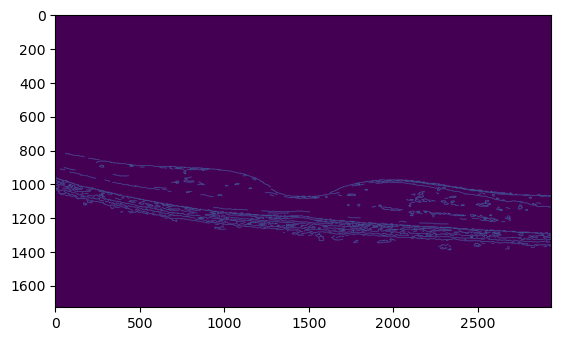

In [118]:
# image = Image.open('2.png').convert('L')

# binary_image = np.array(image) > 215  # Choose a suitable threshold_value
pith_for_binary_image="binary_image.jpg"
binary_image_RPE = cv.imread(pith_for_binary_image, cv2.IMREAD_GRAYSCALE) 
threshold_value = 127 
_, binary_image = cv2.threshold(binary_image_RPE, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)
rpe_layer = extract_RPE(binary_image)
# output_image = Image.fromarray(np.uint8(rpe_layer * 255), 'L')  # Convert boolean to uint8
# output_image.save('path_to_save_extracted_layer.jpg')
# cv_image = np.array(output_image)
# cv2.imshow('Extracted RPE Layer', cv_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

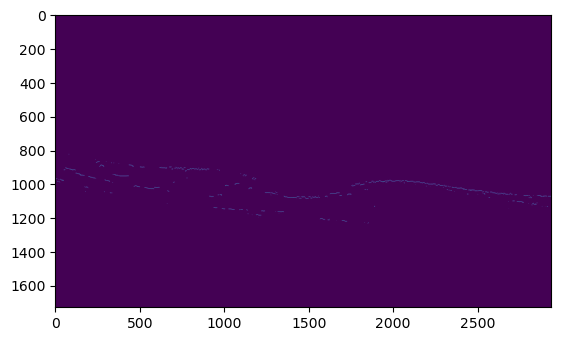

In [119]:
plt.imshow(binary_image)

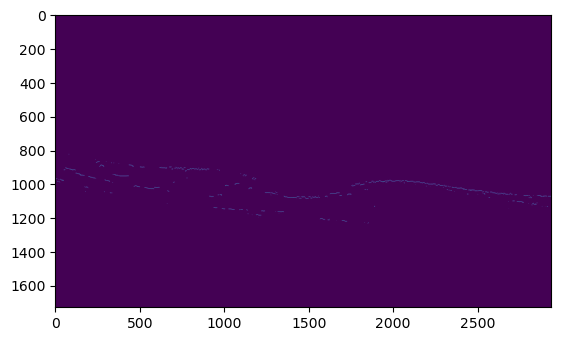

In [120]:
plt.imshow(rpe_layer)

In [121]:
thickness = calculate_thickness(rpe_layer)
print(f"The thickness of the RPE layer is: {thickness}")

The thickness of the RPE layer is: 0.10616485013623979
